## MSDS 432 - Programming Assignment #7 Dan Avni

## Executive Summary

Dijkstra's algorithm for finding the shortest-path between graph nodes is a corner-stone of computer science with many practical, real-world implications in travel, network design, and social studies.

In this assignment we will be looking at two variants of Dijkstra's shortest-path algorithm, the original implementation using a greedy algorithm to scan all neighbor paths at each iteration, and a more modern one using a min-priory queue to extract the best alternative efficiently using a heap data structure, both guaranteed to return the shortest-path, with the priority queue implementation providing a theoretical superior average runtime complexity. In addition, we consider a breadth-first-search (BFS) algorithm, which only guarantees finding the path with the fewest hops, effectively solving only cases where the graph edges are equal weighted.

We use the three algorithms to find the shortest path between New York city and Los Angeles using a a graph spanning 21 edges and 18 nodes.

The below table shows the different algorithm runtime performance averaged over 100 runs as well as the resulting shortest pat in terms of distance and number of hops. We note no discernable difference between the baseline Dijkstra algorithm and the min-priority-queue. This is possibly due to the limited data size or ineffectiveness in the actual implementation.
 

<img src="https://github.com/dannyavni/MSDS_432/blob/master/spath_summary.png?raw=true">

The above table shows the two Dijkstra algorithms producing the same result while the BFS algorithm produced a path with fewer hops, better runtime, failing nonetheless the find the shortest distance.

Below is a visualized path resulting from the two algorithm families:

<img src="https://github.com/dannyavni/MSDS_432/blob/master/djikstra_path.png?raw=true">
<img src="https://github.com/dannyavni/MSDS_432/blob/master/bfs_path.png?raw=true">

The below plots represent the average run time as well as the distribution of the actual 100 runs:

| Mean runtime  | Runtime boxplots  | 
|:-:|:-:|
| <img width="85%" src="https://github.com/dannyavni/MSDS_432/blob/master/runtime6.png?raw=true">| <img width="85%" src="https://github.com/dannyavni/MSDS_432/blob/master/runtime6a.png?raw=true">|






## Implementation

In [1]:
#import required packages
from collections import deque
import heapq
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus as pdp
from IPython.display import Image 

In [2]:
graph_data = \
[
    ('NYC', 'DC', 2),
    ('NYC', 'Pittsbug', 7),
    ('NYC', 'Indianapolis', 11),
    ('DC', 'Atlanta', 2,),
    ('Indianapolis', 'Kansas City', 8),
    ('Pittsbug', 'Cincinati', 6),
    ('Atlanta', 'New Orleans', 2),
    ('Kansas City', 'Denver', 7),
    ('Cincinati', 'St Louis', 8,),
    ('New Orleans', 'Dallas', 2),
    ('Denver', 'Salt Lake City', 6,),
    ('Dallas', 'Albuquerque', 2,),
    ('St Louis', 'Oklahoma City', 7,),
    ('Oklahoma City', 'Albuquerque', 9),
    ('Albuquerque', 'Phoenix', 2),
    ('Salt Lake City', 'Las Vegas', 9),
    ('Phoenix', 'San Diego', 5),
    ('Phoenix', 'Las Vegas', 2),
    ('San Diego', 'Los Angeles', 2),
    ('Las Vegas', 'San Diego', 2), 
    ('Las Vegas', 'Los Angeles', 5)
]

In [3]:
# the graph
graph = {}

for item in graph_data:
    source, destination, cost = item
    if source not in graph:
        graph[source] = []
    graph[source].append((destination, cost))
    
# prepare data frame to hold test results    
test_results_col_names = ['method', 'runtime_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

In [4]:
#Dijkstra helper functions created from Pseudocode here:
#https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

#return a unqie node set from a graph
def create_node_set(graph):
    node_set = set()
    for key in graph.keys():
        node_set.add(key)
        for (child,cost) in graph[key]:
            node_set.add(child)
    return node_set
 
#greedy algorithm selection of the nearest node    
def find_closest(node_set, dist):
    closest_node = None
    closest_dist = float("inf")
   
    for node in node_set:
        if  dist[node] < closest_dist:
            closest_node = node
            closest_dist = dist[node]
            
    return closest_node

#traverse a path back from destination to start
def create_path(start, finish, prev, dist):
    path = deque()
    node = finish
   
    if node in prev or node == start:
        while node != None:
            path.appendleft((node,dist[node]))
            node = prev[node]
    return path

In [5]:
#Dijkstra shortest-path implementation using greedy algorithm created from Pseudocode here:
#https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

def find_shortest_path(graph, start, finish):
    node_set = create_node_set(graph)
    Inf  = float("inf")
    dist = {}
    prev = {}
    
    for node in node_set:
        dist[node] = Inf
        prev[node] = None
        
    dist[start] = 0
    
    while len(node_set):
        closest = find_closest(node_set, dist)
        
        node_set.remove(closest)
        if closest == finish:
            break
        
        for target, distance in graph[closest]:
            alt = dist[closest] + distance
            if alt < dist[target]:
                dist[target] = alt
                prev[target] = closest
            
    return list(create_path(start, finish, prev, dist)), dist[finish]

In [6]:
for i in range(0,100):
    start   = time.time()
    dijkstra_path, dijkstra_cost = find_shortest_path(graph, 'NYC', 'Los Angeles')
    runtime_ms = ((time.time() - start) * 1000)
    test_results.loc[len(test_results)] = ['Dijkstra', runtime_ms]

In [7]:
dijkstra_path, dijkstra_cost

([('NYC', 0),
  ('DC', 2),
  ('Atlanta', 4),
  ('New Orleans', 6),
  ('Dallas', 8),
  ('Albuquerque', 10),
  ('Phoenix', 12),
  ('Las Vegas', 14),
  ('San Diego', 16),
  ('Los Angeles', 18)],
 18)

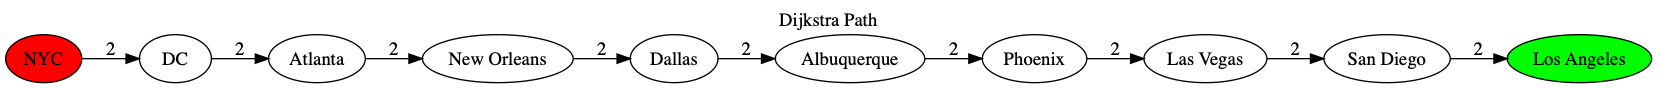

In [8]:
path_as_dot = '\"{}\" [fillcolor=red, style=filled] \"{}\" [fillcolor=green, style=filled]'.\
  format(dijkstra_path[0][0], dijkstra_path[len(dijkstra_path)-1][0])

for i in range(0, len(dijkstra_path)-1):
    path_as_dot += '\"{}\"->\"{}\"'.format(dijkstra_path[i][0], dijkstra_path[i+1][0]) 
    path_as_dot += '[label =\"{}\"];'.format(dijkstra_path[i+1][1] -dijkstra_path[i][1] ) 
  
path_graph = pdp.graph_from_dot_data('digraph { label="Dijkstra Path"; labelloc = "t"; rankdir="LR"; ' + path_as_dot + '}')
 
Image(path_graph.create_png())

In [9]:
#Dijkstra shortest-path implementation using min-priority queue created from Pseudocode here:
#https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

def find_shortest_path_pq(graph, start, finish):
    node_set = create_node_set(graph)
    Inf    = float("inf")
    dist   = {}
    prev   = {}
    pq     = []
    finder = {}
    
    dist[start] = 0

    for node in node_set:
        if node != start:
            dist[node] = Inf
        prev[node] = None
        item = [dist[node], node]
        heapq.heappush(pq, item)
        finder[node] = item

    while len(pq):
        item = heapq.heappop(pq)
        distance, closest = item[0], item[1]
        if closest == finish:
            break
        
        for target, distance in graph[closest]:
            alt = dist[closest] + distance
            if alt < dist[target]:
                dist[target]   = alt
                prev[target]   = closest
                pq.remove(finder[target])
                item = [alt, target]
                finder[target] = item
                heapq.heappush(pq, item)

    return list(create_path(start, finish, prev, dist)), dist[finish]

In [10]:
for i in range(0,100):
    start   = time.time()
    dijkstra_pq_path, dijkstra_pq_cost = find_shortest_path_pq(graph, 'NYC', 'Los Angeles')
    runtime_ms = ((time.time() - start) * 1000)
    test_results.loc[len(test_results)] = ['Dijkstra PQ', runtime_ms]

In [11]:
dijkstra_pq_path, dijkstra_pq_cost

([('NYC', 0),
  ('DC', 2),
  ('Atlanta', 4),
  ('New Orleans', 6),
  ('Dallas', 8),
  ('Albuquerque', 10),
  ('Phoenix', 12),
  ('Las Vegas', 14),
  ('San Diego', 16),
  ('Los Angeles', 18)],
 18)

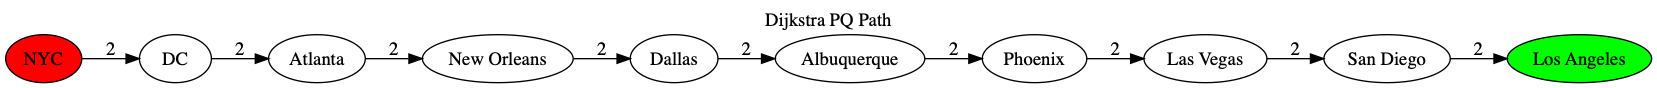

In [12]:
path_as_dot = '\"{}\" [fillcolor=red, style=filled] \"{}\" [fillcolor=green, style=filled]'.\
  format(dijkstra_pq_path[0][0], dijkstra_path[len(dijkstra_pq_path)-1][0])

for i in range(0, len(dijkstra_path)-1):
    path_as_dot += '\"{}\"->\"{}\"'.format(dijkstra_pq_path[i][0], dijkstra_pq_path[i+1][0]) 
    path_as_dot += '[label =\"{}\"];'.format(dijkstra_pq_path[i+1][1] -dijkstra_pq_path[i][1] ) 
  
path_graph = pdp.graph_from_dot_data('digraph { label="Dijkstra PQ Path"; labelloc = "t";rankdir="LR"; ' + path_as_dot + '}')
 
Image(path_graph.create_png())

In [13]:
#breadth-first-search (bfs) implementation adapted and heavily modified from: 
#https://github.com/egonSchiele/grokking_algorithms/

def breadth_first_shortest_path(graph, start, finish):
    search_queue = deque([(start, [(start,0)])])
    # This set is how you keep track of which items you've searched before.
    searched = set()
    while search_queue:
        cur_item, history = search_queue.popleft()
        if cur_item == finish:
            return history, sum(map(lambda d: d[1], history)) 
        # Only search this item if you haven't already searched them.
        if cur_item not in searched:
            for child, dist in graph[cur_item]:
                child_history = history.copy()
                child_history.append((child, dist))
                search_queue.append((child, child_history))
            # Marks this item as searched
            searched.add(cur_item)
    return None, None

In [14]:
for i in range(0,100):
    start   = time.time()
    bfs_path, bfs_cost = breadth_first_shortest_path(graph, 'NYC', 'Los Angeles')
    runtime_ms = ((time.time() - start) * 1000)
    test_results.loc[len(test_results)] = ['BFS', runtime_ms]

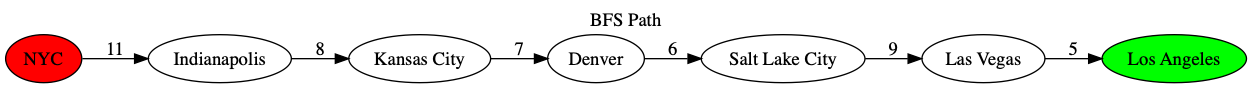

In [15]:
path_as_dot = '\"{}\" [fillcolor=red, style=filled] \"{}\" [fillcolor=green, style=filled]'.\
  format(bfs_path[0][0], bfs_path[len(bfs_path)-1][0])

for i in range(0, len(bfs_path)-1):
    path_as_dot += '\"{}\"->\"{}\"'.format(bfs_path[i][0], bfs_path[i+1][0]) 
    path_as_dot += '[label =\"{}\"];'.format(bfs_path[i+1][1] ) 
  
path_graph = pdp.graph_from_dot_data('digraph {label="BFS Path"; labelloc = "t"; rankdir="LR"; ' + \
                                     path_as_dot + '}')
 
Image(path_graph.create_png())

In [16]:
#prepare an empty data frame with the desired column names
test_results_mean_col_names = ['method', 'mean_runtime_ms', 'distance', 'hops']
test_results_mean           = pd.DataFrame(columns = test_results_mean_col_names) 

dijkstra_mean = test_results.loc[test_results['method']=='Dijkstra', 'runtime_ms'].mean()
test_results_mean.loc[len(test_results_mean)] = \
  ['Dijakstra', dijkstra_mean, dijkstra_cost, len(dijkstra_path)]

dijkstra_pq_mean = test_results.loc[test_results['method']=='Dijkstra PQ', 'runtime_ms'].mean()
test_results_mean.loc[len(test_results_mean)] = \
  ['Dijakstra Priority Queue', dijkstra_pq_mean, dijkstra_pq_cost, len(dijkstra_pq_path)]

bfs_mean = test_results.loc[test_results['method']=='BFS', 'runtime_ms'].mean()
test_results_mean.loc[len(test_results_mean)] = \
  ['BFS', bfs_mean, bfs_cost, len(bfs_path)]

test_results_mean

,method,mean_runtime_ms,distance,hops
0,Dijakstra,0.063887,18,10
1,Dijakstra Priority Queue,0.081074,18,10
2,BFS,0.029035,46,7


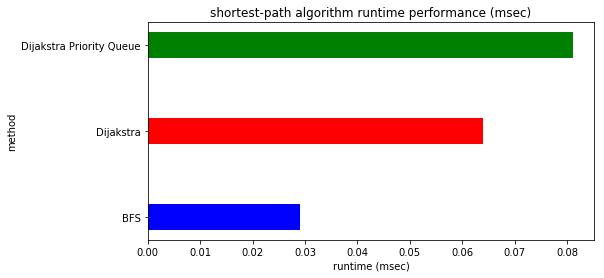

In [17]:
#prdoduce a bar plot of the mean search time by level
plt.figure(figsize=(8,4))
plt.barh(test_results_mean.method, test_results_mean.mean_runtime_ms, height=0.3, 
         color=['red', 'green',  'blue'])
plt.ylabel('method')
plt.xlabel('runtime (msec)')
plt.title('shortest-path algorithm runtime performance (msec)')
plt.show()

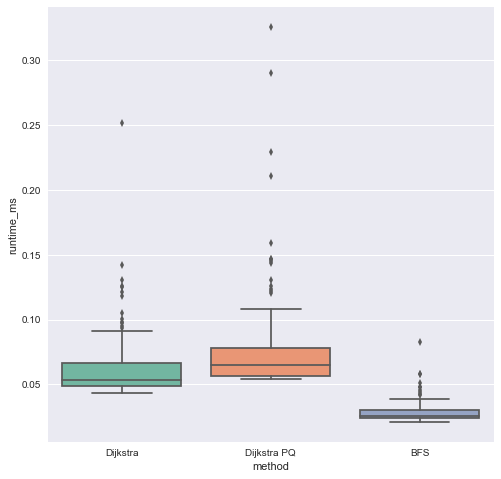

In [18]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.boxplot(x="method", y="runtime_ms", data=test_results, palette="Set2")

## Extra work 

We traverse the tree to visualize the entire graph and the BFS search order.

In [19]:
def breadth_first_traverse(graph, start, finish):
    step = 0
    search_queue = deque([start])
    # This set is how you keep track of which items you've searched before.
    searched = set()
    output = '\"{}\" [fillcolor=red, style=filled] \"{}\" [fillcolor=green, style=filled]'.\
          format(start, finish)
    while search_queue:
        cur_item = search_queue.popleft()
        # Only search this item if you haven't already searched them.
        if cur_item not in searched:
            output += \
            "\"{}\" [label=\"{}\", xlabel=\"{}\"];".format(cur_item, cur_item, step)
            if cur_item == finish:
                break
            for child, distance in graph[cur_item]:
                output += "\"{}\"->\"{}\" [label={}];".format(cur_item, child, distance)
                search_queue.append(child)
            # Marks this item as searched
            step += 1
            searched.add(cur_item)
    return 'digraph {' + output + '}';

In [20]:
tree_as_dot = breadth_first_traverse(graph, 'NYC', 'Los Angeles')

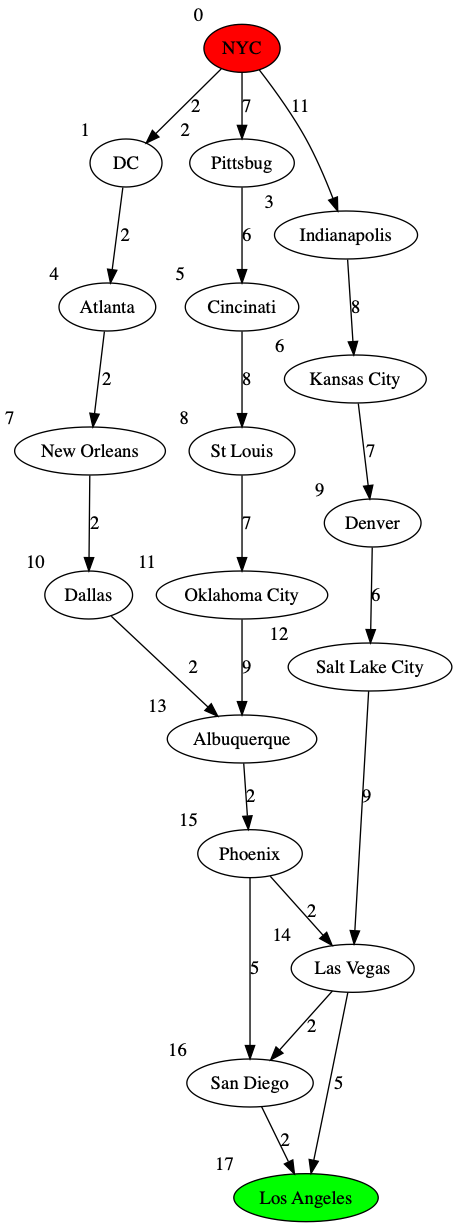

In [21]:
path_graph = pdp.graph_from_dot_data(tree_as_dot)
 
Image(path_graph.create_png())